In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt



In [2]:
import rdkit
print(rdkit.__version__)

2023.03.1


In [3]:
!wget https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv

'wget' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


In [4]:
sol = pd.read_csv('delaney.csv')
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [5]:
sol['SMILES'][0]

'ClCC(Cl)(Cl)Cl'

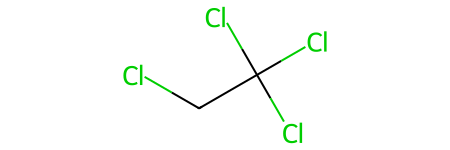

In [6]:
from rdkit import Chem

m = Chem.MolFromSmiles(sol['SMILES'][0])
m

In [7]:
# 元素数
m.GetNumAtoms()

6

In [8]:
mol_list = [Chem.MolFromSmiles(element) for element in sol['SMILES']]
len(mol_list)

1144

In [9]:
from rdkit.Chem import Descriptors

def calculate_three_descriptors(smiles, verbose=False):
    
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)
        
    baseData = np.arange(1, 1)
    i = 0
    for mol in moldata:
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
        
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])
        
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i = i + 1
        
    columnNames = ["MolLogP","MolWt","NumRotatableBonds"]
    # RotatableBonds:回転可能な結合の数・MolWt：分子量
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)
    
    return descriptors



In [10]:
df = calculate_three_descriptors(sol['SMILES'])
df

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


In [11]:
# AP（芳香族の比率）を求める。
m = Chem.MolFromSmiles('CNC(=O)Oc1cc(C)cc(C)c1')

aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms


[False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True]

In [12]:
def AromaticAtoms(m):
    aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
    aa_count = []
    for i in aromatic_atoms:
        if i == True:
            aa_count.append(i)
        
    sum_aa_count = len(aa_count)
    return sum_aa_count

In [13]:
AromaticAtoms(m)

6

In [14]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms
#SMILEデータのベンゼン環に関連する原子数

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 10,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 10,
 6,
 0,
 10,
 0,
 14,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 12,
 10,
 14,
 6,
 10,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 6,
 12,
 12,
 6,
 0,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 10,
 0,
 6,
 12,
 12,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 12,
 12,
 6,
 10,
 6,
 6,
 6,
 12,
 10,
 14,
 10,
 10,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 12,
 0,
 10,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 6,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,

In [15]:
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticAtoms, columns=['AromaticProportion'])
df_desc_AromaticProportion

,AromaticProportion
0,0
1,0
2,0
3,0
4,0
...,...
1139,0
1140,6
1141,16
1142,12


In [16]:
X = pd.concat([df, df_desc_AromaticProportion], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0
1,2.37650,133.405,0.0,0
2,2.59380,167.850,1.0,0
3,2.02890,133.405,1.0,0
4,2.91890,187.375,1.0,0
...,...,...,...,...
1139,1.98820,287.343,8.0,0
1140,3.42130,286.114,2.0,6
1141,3.60960,308.333,4.0,16
1142,2.56214,354.815,3.0,12


In [17]:
# logSは水への溶解度
y = sol.iloc[:,1]
y = y.rename('logS')
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

<Axes: >

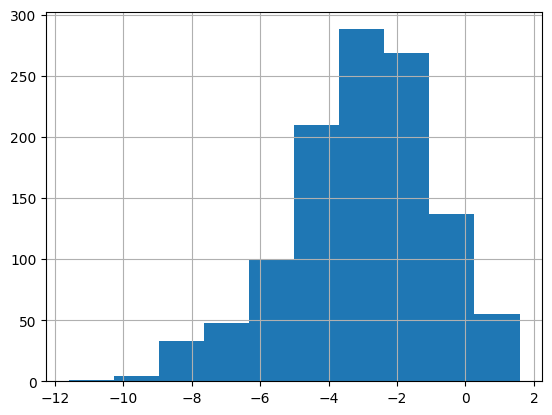

In [18]:
y.hist()

## QSPR解析

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
y_pred_train = model.predict(X_train)

print('Coefficients:', model.coef_)
print('Intercept', model.intercept_)
print('Mean squared error (MSE): %.2f' %mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f' %r2_score(y_train, y_pred_train)) # 決定係数

Coefficients: [-0.70037729 -0.00602204 -0.0061665  -0.04651649]
Intercept 0.14733367380661333
Mean squared error (MSE): 1.00
Coefficient of determination (R^2): 0.77


In [22]:
y_pred_test = model.predict(X_test)

print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred_test))

print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred_test))


Coefficient: [-0.70037729 -0.00602204 -0.0061665  -0.04651649]
Intercept: 0.14733367380661333
Mean squared error (MSE): 0.93
Coefficient of determination (R^2): 0.80


In [23]:
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
AP = '%.2f AP' % model.coef_[3]

print('LogS = ' + 
      ' '+ 
      yintercept+
      ' ' +
      LogP +
      ' ' +
      MW + 
      ' '+
      RB +
      ' ' +
      AP)


LogS =  0.15 -0.70 LogP -0.0060 MW -0.0062 RB -0.05 AP


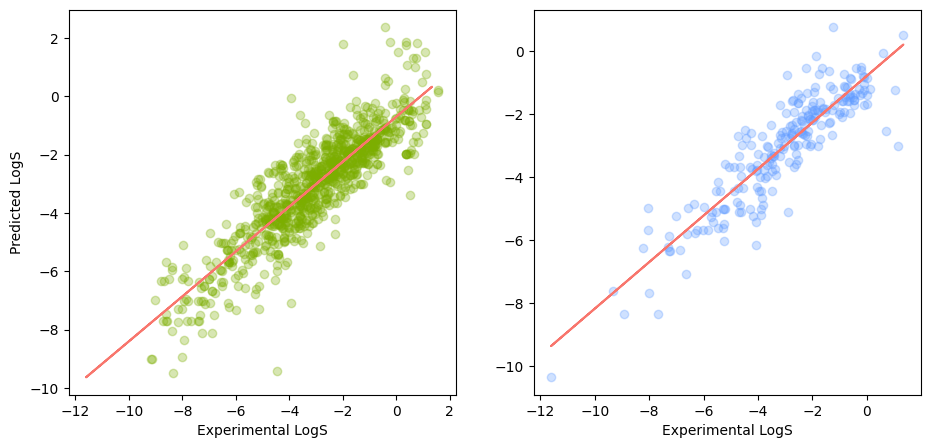

In [24]:
# 左側のプロット（訓練データに対する実測logSと予測logS）
plt.figure(figsize=(11, 5))


plt.subplot(1, 2, 1)
plt.scatter(x=y_train, y=y_pred_train, c="#7CAE00", alpha=0.3) # alphaはグラフの透明度

z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

# 右側のプロット (テストデータに対する実測logSと予測logS)
plt.subplot(1, 2, 2)
plt.scatter(x=y_test, y=y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), "#F8766D")

plt.xlabel("Experimental LogS")
plt.show()

# アンサンブル学習による水溶解度予測

In [25]:
train = [mol for mol in Chem.SDMolSupplier('solubility.train.sdf.txt')]
test = [mol for mol in Chem.SDMolSupplier('solubility.test.sdf.txt')]

print('training: ', len(train))
print('test: ', len(test))

training:  1025
test:  257


In [28]:
!head -n 40 solubility.train.sdf.txt

'head' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


In [31]:
train[0].GetPropsAsDict()["SOL"] # SOLがlogsを表している。

-3.18

In [32]:
train[0].GetPropsAsDict()["smiles"] # smiles記法

'CCCCC'

In [33]:
from rdkit.ML.Descriptors import MoleculeDescriptors

descs = [desc_name[0] for desc_name in Descriptors._descList]
descs


['MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VS

In [34]:
len(descs)

209

In [36]:
desc_calc = MoleculeDescriptors.MolecularDescriptorCalculator(descs) # すべての記述しを計算する。

In [49]:
X  = [desc_calc.CalcDescriptors(mol) for mol in train]
y = [mol.GetPropsAsDict()["SOL"] for mol in train]

test_X = [desc_calc.CalcDescriptors(mol) for mol in test]
test_y = [mol.GetPropsAsDict()["SOL"] for mol in test]




In [42]:
len(X)


1025

In [43]:
X[0]

(2.2118055555555554,
 2.2118055555555554,
 1.34375,
 1.34375,
 0.4687855098011332,
 72.151,
 60.05499999999999,
 72.093900384,
 32,
 0,
 -0.05383131543183678,
 -0.06538255537938412,
 0.06538255537938412,
 0.05383131543183678,
 1.0,
 1.4,
 1.4,
 13.744962415414642,
 10.279705138833732,
 1.6770337181948811,
 -1.7882347992017722,
 1.878062415414647,
 -1.5871948611662696,
 4.236962415414642,
 0.7717051388337315,
 1.4056390622295665,
 2.19060968716425,
 7.5097750043269365,
 4.121320343559642,
 4.121320343559642,
 4.121320343559642,
 2.414213562373095,
 2.414213562373095,
 2.414213562373095,
 1.3535533905932735,
 1.3535533905932735,
 0.7071067811865474,
 0.7071067811865474,
 0.3535533905932737,
 0.3535533905932737,
 0.0,
 11.245112497836532,
 5.0,
 4.0,
 4.0,
 34.19901948541599,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 33.10993926815928,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 33.10993926815928,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3

In [50]:
y[:5] # SOL

[-3.18, -2.64, -3.84, -3.74, -3.55]

## 208の特徴量から化合物の溶解度を予測する。lightgbmでのアンサンブル学習

In [51]:
print(len(X))
print(len(y))

# ここで長さ同じだったらtrain_test_splitできる。


1025
1025


In [52]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_y, test_y) = train_test_split(X, y, test_size=0.2) # test_sizeでテスト用にするデータの割合を指定


In [54]:
import lightgbm as lgb

In [60]:
lgb_train = lgb.Dataset(train_X, label=train_y, free_raw_data=False)
lgb_test = lgb.Dataset(test_X, label=test_y, free_raw_data=False)


lightgbm.basic.Dataset

In [62]:
# パラメータの指定
params = {'num_leaves':31,
          'min_data_in_leaf':30,
          'objective':'regression',
          'max_depth': -1,
          'learning_rate':0.01,
          "min_child_samples": 20,
          "boosting": "gbdt",
          "feature_fraction": 0.9,
          "bagging_freq": 1, 
          "bagging_fraction": 0.9,
          "bagging_seed": 11,
          "metric": "rmse",
          "lambda_l1": "0.1",
          "verbosity": -1,
          "nthread": 4,
          "random_state": 0}

